In [2]:
#GRAF AND ALGORITHM

import heapq
import networkx as nx
import matplotlib.pyplot as plt

def djikstra_with_path(graph, start):
  distances = {node : float('inf') for node in graph}
  distances[start] = 0
  previous = {node: None for node in graph}
  queue = [(0, start)]

  while queue:
    current_distance, current_node = heapq.heappop(queue)
    for neighbor, weight in graph[current_node].items():
      distance = current_distance + weight
      if distance < distances[neighbor]:
        distances[neighbor] = distance
        previous[neighbor] = current_node
        heapq.heappush(queue, (distance, neighbor))

  return distances, previous

#PATH FUNCTION
def get_path(previous, target):
  path = []
  while target is not None:
    path.insert(0, target)
    target = previous[target]

  return path

#VISUALIZATION
def visualize_graph(graph, path=None):
  G = nx.DiGraph()

  for node in graph:
    for neighbor, weight in graph[node].items():
      G.add_edge(node, neighbor, weight=weight)

  pos = nx.kamada_kawai_layout(G) #ubah_layout_graf
  edge_labels = nx.get_edge_attributes(G, 'weight')

  plt.figure(figsize=(8, 6))
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight ='bold', arrows=True)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  #GARIS TEBAL UNTUK JARAK TERPENDEK
  if path and len(path) > 1:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red',width=3)

  plt.title('Visualisasi Graf dan Jalur Terpendek')
  plt.axis('off')
  plt.show()

jarak dari A ke Z: 18
Jalur: A > B > C > D > E > F > G > Z


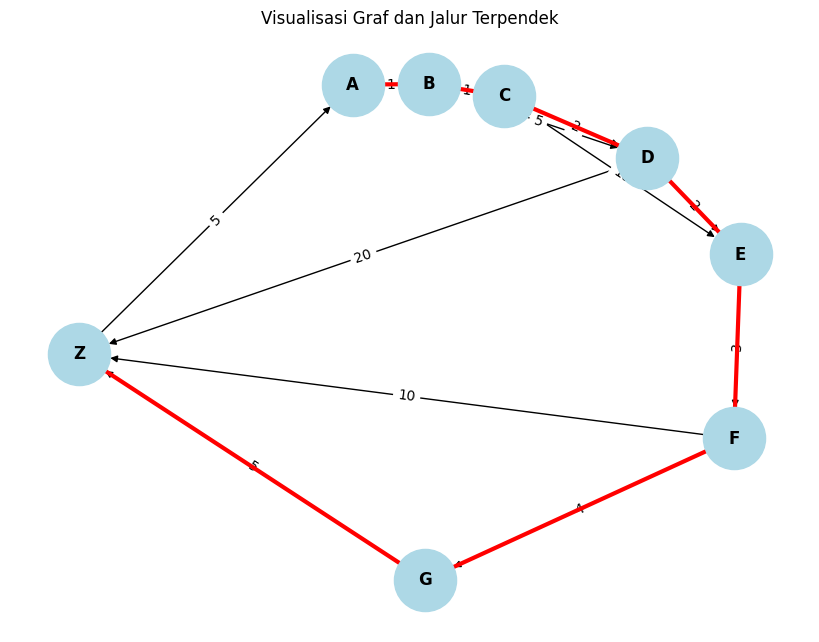

In [3]:
#USE

graph = {
    'A' : {'B': 1, 'C': 4},
    'B' : {'C': 1, 'D': 5},
    'C' : {'D': 2, 'E': 10},
    'D' : {'E': 2, 'Z': 20},
    'E' : {'F': 3},
    'F' : {'G': 4, 'Z' : 10}, #simpul_baru
    'G' : {'Z' : 5},  #simpul_baru
    'Z' : {'A' : 5} #siklus_graf_kembali_ke_start
}

#DJIKSTRA
start_node = 'A'
end_node = 'Z'
distances, previous = djikstra_with_path(graph, start_node)

#PATH
shortest_path = get_path(previous, end_node)
print(f'jarak dari {start_node} ke {end_node}: {distances[end_node]}')
print(f'Jalur: {" > ".join(shortest_path)}')

#VISUAL
visualize_graph(graph, path=shortest_path)